In [1]:
# keras
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist, imdb, boston_housing
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

# MNIST Data Handling (Handwritten Digit Classification)
def mnist_model():
    # Load MNIST data
    (train_images, train_labels), (test_images, test_labels) = mnist.load_data()
    train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
    test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

    # One-hot encoding of labels
    train_labels = to_categorical(train_labels)
    test_labels = to_categorical(test_labels)

    # Build CNN model for MNIST
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))

    # Flatten and add Dense layers
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))  # Output layer for 10 classes

    # Compile the model
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # Train the model
    model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.2)

    # Evaluate the model
    test_loss, test_acc = model.evaluate(test_images, test_labels)
    print(f"MNIST Test accuracy: {test_acc}")


# IMDB Data Handling (Sentiment Analysis)
def imdb_model():
    # Load IMDB data
    (train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

    # Pad sequences to ensure uniform input length
    maxlen = 256
    train_data = pad_sequences(train_data, maxlen=maxlen)
    test_data = pad_sequences(test_data, maxlen=maxlen)

    # Build the model for IMDB
    model = models.Sequential()
    model.add(layers.Embedding(10000, 128, input_length=maxlen))
    model.add(layers.LSTM(128))  # Using LSTM for sequence processing
    model.add(layers.Dense(1, activation='sigmoid'))  # Binary classification (positive/negative)

    # Compile the model
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    # Train the model
    model.fit(train_data, train_labels, epochs=5, batch_size=128, validation_split=0.2)

    # Evaluate the model
    test_loss, test_acc = model.evaluate(test_data, test_labels)
    print(f"IMDB Test accuracy: {test_acc}")


# Boston Housing Data Handling (House Price Prediction)
def boston_housing_model():
    # Load Boston Housing data
    (train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

    # Normalize the data (important for regression)
    mean = train_data.mean(axis=0)
    std = train_data.std(axis=0)
    train_data = (train_data - mean) / std
    test_data = (test_data - mean) / std

    # Build the model for Boston Housing
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))  # Output layer for regression (house price prediction)

    # Compile the model
    model.compile(optimizer='adam',
                  loss='mse',  # Mean Squared Error for regression
                  metrics=['mae'])  # Mean Absolute Error as an additional metric

    # Train the model
    model.fit(train_data, train_labels, epochs=10, batch_size=64, validation_split=0.2)

    # Evaluate the model
    test_loss, test_mae = model.evaluate(test_data, test_labels)
    print(f"Boston Housing Test MAE: {test_mae}")


# Run all models
print("Training and evaluating on MNIST dataset (handwritten digits)...")
mnist_model()

print("\nTraining and evaluating on IMDB dataset (sentiment analysis)...")
imdb_model()

print("\nTraining and evaluating on Boston Housing dataset (house price prediction)...")
boston_housing_model()


Training and evaluating on MNIST dataset (handwritten digits)...
11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 17s 1us/step


C:\Users\hoang\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 37s 26ms/step - accuracy: 0.8428 - loss: 0.5063 - val_accuracy: 0.9743 - val_loss: 0.0904
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 21s 28ms/step - accuracy: 0.9793 - loss: 0.0625 - val_accuracy: 0.9845 - val_loss: 0.0504
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 19s 25ms/step - accuracy: 0.9873 - loss: 0.0385 - val_accuracy: 0.9856 - val_loss: 0.0470
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 19s 26ms/step - accuracy: 0.9907 - loss: 0.0305 - val_accuracy: 0.9880 - val_loss: 0.0413
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 18s 24ms/step - accuracy: 0.9931 - loss: 0.0225 - val_accuracy: 0.9866 - val_loss: 0.0458
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.9843 - loss: 0.0499
MNIST Test accuracy: 0.9879999756813049

Training and evaluating on IMDB dataset (sentiment analysis)...
Epoch 1/5


C:\Users\hoang\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


157/157 ━━━━━━━━━━━━━━━━━━━━ 163s 1s/step - accuracy: 0.6476 - loss: 0.6007 - val_accuracy: 0.8516 - val_loss: 0.3579
Epoch 2/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 154s 976ms/step - accuracy: 0.8855 - loss: 0.2837 - val_accuracy: 0.8604 - val_loss: 0.3531
Epoch 3/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 153s 972ms/step - accuracy: 0.9095 - loss: 0.2375 - val_accuracy: 0.8644 - val_loss: 0.3256
Epoch 4/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 349s 2s/step - accuracy: 0.9477 - loss: 0.1490 - val_accuracy: 0.8590 - val_loss: 0.3442
Epoch 5/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 212s 1s/step - accuracy: 0.9662 - loss: 0.1091 - val_accuracy: 0.8356 - val_loss: 0.4837
782/782 ━━━━━━━━━━━━━━━━━━━━ 2168s 3s/step - accuracy: 0.8414 - loss: 0.4899
IMDB Test accuracy: 0.8427600264549255

Training and evaluating on Boston Housing dataset (house price prediction)...
Epoch 1/10


C:\Users\hoang\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 70ms/step - loss: 559.3510 - mae: 21.5918 - val_loss: 596.8865 - val_mae: 22.5736
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 518.7668 - mae: 20.8093 - val_loss: 573.2766 - val_mae: 22.0277
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 498.7065 - mae: 20.3404 - val_loss: 546.3218 - val_mae: 21.3889
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 476.5768 - mae: 19.4962 - val_loss: 515.4600 - val_mae: 20.6218
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 444.9115 - mae: 18.8193 - val_loss: 479.6053 - val_mae: 19.7060
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 402.6521 - mae: 17.6048 - val_loss: 438.0397 - val_mae: 18.6044
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 356.1936 - mae: 16.3162 - val_loss: 389.7594 - val_mae: 17.2543
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 322.0685 - mae: 15.1634 - val_loss: 336.6273 - val_mae: 15.8067
Epoch 9/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist, imdb, boston_housing
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

# MNIST Data Handling (Handwritten Digit Classification)
def mnist_model():
    # Load MNIST data
    (train_images, train_labels), (test_images, test_labels) = mnist.load_data()
    train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
    test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

    # One-hot encoding of labels
    train_labels = to_categorical(train_labels)
    test_labels = to_categorical(test_labels)

    # Build CNN model for MNIST
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))

    # Flatten and add Dense layers
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))  # Output layer for 10 classes

    # Compile the model
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # Train the model
    model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.2)

    # Evaluate the model
    test_loss, test_acc = model.evaluate(test_images, test_labels)
    print(f"MNIST Test accuracy: {test_acc}")


# IMDB Data Handling (Sentiment Analysis)
def imdb_model():
    # Load IMDB data
    (train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

    # Pad sequences to ensure uniform input length
    maxlen = 256
    train_data = pad_sequences(train_data, maxlen=maxlen)
    test_data = pad_sequences(test_data, maxlen=maxlen)

    # Build the model for IMDB
    model = models.Sequential()
    model.add(layers.Embedding(10000, 128, input_length=maxlen))
    model.add(layers.LSTM(128))  # Using LSTM for sequence processing
    model.add(layers.Dense(1, activation='sigmoid'))  # Binary classification (positive/negative)

    # Compile the model
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    # Train the model
    model.fit(train_data, train_labels, epochs=5, batch_size=128, validation_split=0.2)

    # Evaluate the model
    test_loss, test_acc = model.evaluate(test_data, test_labels)
    print(f"IMDB Test accuracy: {test_acc}")


# Boston Housing Data Handling (House Price Prediction)
def boston_housing_model():
    # Load Boston Housing data
    (train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

    # Normalize the data (important for regression)
    mean = train_data.mean(axis=0)
    std = train_data.std(axis=0)
    train_data = (train_data - mean) / std
    test_data = (test_data - mean) / std

    # Build the model for Boston Housing
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))  # Output layer for regression (house price prediction)

    # Compile the model
    model.compile(optimizer='adam',
                  loss='mse',  # Mean Squared Error for regression
                  metrics=['mae'])  # Mean Absolute Error as an additional metric

    # Train the model
    model.fit(train_data, train_labels, epochs=10, batch_size=64, validation_split=0.2)

    # Evaluate the model
    test_loss, test_mae = model.evaluate(test_data, test_labels)
    print(f"Boston Housing Test MAE: {test_mae}")


# Run all models
print("Training and evaluating on MNIST dataset (handwritten digits)...")
mnist_model()

print("\nTraining and evaluating on IMDB dataset (sentiment analysis)...")
imdb_model()

print("\nTraining and evaluating on Boston Housing dataset (house price prediction)...")
boston_housing_model()


Training and evaluating on MNIST dataset (handwritten digits)...


D:\IDE\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 18s 18ms/step - accuracy: 0.8348 - loss: 0.5107 - val_accuracy: 0.9755 - val_loss: 0.0796
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 20s 17ms/step - accuracy: 0.9814 - loss: 0.0611 - val_accuracy: 0.9838 - val_loss: 0.0525
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - accuracy: 0.9872 - loss: 0.0408 - val_accuracy: 0.9843 - val_loss: 0.0534
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step - accuracy: 0.9894 - loss: 0.0318 - val_accuracy: 0.9893 - val_loss: 0.0376
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - accuracy: 0.9933 - loss: 0.0205 - val_accuracy: 0.9888 - val_loss: 0.0377
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9845 - loss: 0.0417
MNIST Test accuracy: 0.9883000254631042

Training and evaluating on IMDB dataset (sentiment analysis)...
Epoch 1/5


D:\IDE\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


157/157 ━━━━━━━━━━━━━━━━━━━━ 72s 433ms/step - accuracy: 0.6796 - loss: 0.5686 - val_accuracy: 0.8340 - val_loss: 0.4159
Epoch 2/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 86s 551ms/step - accuracy: 0.8944 - loss: 0.2741 - val_accuracy: 0.8452 - val_loss: 0.3916
Epoch 3/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 82s 521ms/step - accuracy: 0.9219 - loss: 0.2094 - val_accuracy: 0.8756 - val_loss: 0.3201
Epoch 4/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 84s 532ms/step - accuracy: 0.9567 - loss: 0.1257 - val_accuracy: 0.8600 - val_loss: 0.3896
Epoch 5/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 85s 541ms/step - accuracy: 0.9643 - loss: 0.1050 - val_accuracy: 0.8498 - val_loss: 0.3808
782/782 ━━━━━━━━━━━━━━━━━━━━ 51s 66ms/step - accuracy: 0.8484 - loss: 0.4016
IMDB Test accuracy: 0.849399983882904

Training and evaluating on Boston Housing dataset (house price prediction)...


D:\IDE\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 124ms/step - loss: 575.5974 - mae: 22.1272 - val_loss: 612.8371 - val_mae: 23.0201
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 488.7521 - mae: 20.4611 - val_loss: 587.3776 - val_mae: 22.4750
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 529.3344 - mae: 21.1654 - val_loss: 561.1499 - val_mae: 21.9009
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 489.2606 - mae: 20.1934 - val_loss: 533.3953 - val_mae: 21.2684
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 466.5761 - mae: 19.6096 - val_loss: 501.6544 - val_mae: 20.5231
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 413.3024 - mae: 18.4736 - val_loss: 465.6006 - val_mae: 19.6421
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 377.7481 - mae: 17.3853 - val_loss: 424.5198 - val_mae: 18.5976
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 348.9411 - mae: 16.6348 - val_loss: 378.9616 - val_mae: 17.3860
Epoch 9/10
6/6 ━━━━━━━━━━━━━━━━

In [4]:
# cnn
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist, imdb, boston_housing
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

# Function for MNIST Model (Handwritten Digit Classification)
def mnist_model():
    # Load MNIST data
    (train_images, train_labels), (test_images, test_labels) = mnist.load_data()
    train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
    test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

    # One-hot encoding of labels
    train_labels = to_categorical(train_labels)
    test_labels = to_categorical(test_labels)

    # Build CNN model for MNIST
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))

    # Flatten and add Dense layers
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))  # Output layer for 10 classes

    # Compile the model
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # Train the model
    model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.2)

    # Evaluate the model
    test_loss, test_acc = model.evaluate(test_images, test_labels)
    print(f"MNIST Test accuracy: {test_acc}")

# Function for IMDB Model (Sentiment Analysis)
def imdb_model():
    # Load IMDB data (only keep the top 10,000 most frequent words)
    max_features = 10000
    maxlen = 500  # Cut texts after this number of words

    (input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)

    # Pad sequences to ensure uniform input length
    input_train = pad_sequences(input_train, maxlen=maxlen)
    input_test = pad_sequences(input_test, maxlen=maxlen)

    # Build RNN model for IMDB
    model = models.Sequential()
    model.add(layers.Embedding(max_features, 128))
    model.add(layers.SimpleRNN(128, return_sequences=False))
    model.add(layers.Dense(1, activation='sigmoid'))  # Output for binary classification

    # Compile the model
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    # Train the model
    model.fit(input_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

    # Evaluate the model
    test_loss, test_acc = model.evaluate(input_test, y_test)
    print(f"IMDB Test accuracy: {test_acc}")

# Function for Boston Housing Model (House Price Prediction)
def boston_housing_model():
    # Load Boston Housing data
    (train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

    # Normalize the data
    mean = train_data.mean(axis=0)
    std = train_data.std(axis=0)
    train_data = (train_data - mean) / std
    test_data = (test_data - mean) / std

    # Build the model for Boston Housing
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))  # Output for regression (predict house prices)

    # Compile the model
    model.compile(optimizer='adam',
                  loss='mse',  # Mean Squared Error for regression
                  metrics=['mae'])  # Mean Absolute Error as additional metric

    # Train the model
    model.fit(train_data, train_labels, epochs=10, batch_size=64, validation_split=0.2)

    # Evaluate the model
    test_loss, test_mae = model.evaluate(test_data, test_labels)
    print(f"Boston Housing Test MAE: {test_mae}")

# Run all models
print("Training and evaluating on MNIST dataset (handwritten digits)...")
mnist_model()

print("\nTraining and evaluating on IMDB dataset (sentiment analysis)...")
imdb_model()

print("\nTraining and evaluating on Boston Housing dataset (house price prediction)...")
boston_housing_model()


Training and evaluating on MNIST dataset (handwritten digits)...
Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.8449 - loss: 0.5019 - val_accuracy: 0.9801 - val_loss: 0.0700
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.9807 - loss: 0.0636 - val_accuracy: 0.9857 - val_loss: 0.0486
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.9870 - loss: 0.0410 - val_accuracy: 0.9862 - val_loss: 0.0449
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.9896 - loss: 0.0310 - val_accuracy: 0.9872 - val_loss: 0.0444
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.9929 - loss: 0.0232 - val_accuracy: 0.9870 - val_loss: 0.0455
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9835 - loss: 0.0482
MNIST Test accuracy: 0.987500011920929

Training and evaluating on IMDB dataset (sentiment analysis)...
Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 63s 96ms/step - accuracy: 0.5578 - loss: 0.6791 - val_accuracy: 0.6156 - val

In [6]:
#rnn
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist, imdb, boston_housing
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

# Function for MNIST Model (Handwritten Digit Classification)
def mnist_model():
    print("Loading MNIST data...")
    # Load MNIST data
    (train_images, train_labels), (test_images, test_labels) = mnist.load_data()
    train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
    test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

    # One-hot encoding of labels
    train_labels = to_categorical(train_labels)
    test_labels = to_categorical(test_labels)

    # Build CNN model for MNIST
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))

    # Flatten and add Dense layers
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))  # Output layer for 10 classes

    # Compile the model
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # Train the model
    print("Training MNIST model...")
    model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.2)

    # Evaluate the model
    test_loss, test_acc = model.evaluate(test_images, test_labels)
    print(f"MNIST Test accuracy: {test_acc:.4f}")

# Function for IMDB Model (Sentiment Analysis)
def imdb_model():
    print("Loading IMDB data...")
    # Load IMDB data (only keep the top 10,000 most frequent words)
    max_features = 10000
    maxlen = 500  # Cut texts after this number of words

    (input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)

    # Pad sequences to ensure uniform input length
    input_train = pad_sequences(input_train, maxlen=maxlen)
    input_test = pad_sequences(input_test, maxlen=maxlen)

    # Build RNN model for IMDB
    model = models.Sequential()
    model.add(layers.Embedding(max_features, 128))
    model.add(layers.SimpleRNN(128, return_sequences=False))
    model.add(layers.Dense(1, activation='sigmoid'))  # Output for binary classification

    # Compile the model
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    # Train the model
    print("Training IMDB model...")
    model.fit(input_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

    # Evaluate the model
    test_loss, test_acc = model.evaluate(input_test, y_test)
    print(f"IMDB Test accuracy: {test_acc:.4f}")

# Function for Boston Housing Model (House Price Prediction)
def boston_housing_model():
    print("Loading Boston Housing data...")
    # Load Boston Housing data
    (train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

    # Normalize the data
    mean = train_data.mean(axis=0)
    std = train_data.std(axis=0)
    train_data = (train_data - mean) / std
    test_data = (test_data - mean) / std

    # Build the model for Boston Housing
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))  # Output for regression (predict house prices)

    # Compile the model
    model.compile(optimizer='adam',
                  loss='mse',  # Mean Squared Error for regression
                  metrics=['mae'])  # Mean Absolute Error as additional metric

    # Train the model
    print("Training Boston Housing model...")
    model.fit(train_data, train_labels, epochs=10, batch_size=64, validation_split=0.2)

    # Evaluate the model
    test_loss, test_mae = model.evaluate(test_data, test_labels)
    print(f"Boston Housing Test MAE: {test_mae:.4f}")

# Run all models
print("=== Training and evaluating models ===")
mnist_model()
imdb_model()
boston_housing_model()


=== Training and evaluating models ===
Loading MNIST data...
Training MNIST model...
Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 21s 20ms/step - accuracy: 0.8512 - loss: 0.4934 - val_accuracy: 0.9805 - val_loss: 0.0673
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 14s 18ms/step - accuracy: 0.9818 - loss: 0.0581 - val_accuracy: 0.9851 - val_loss: 0.0536
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 14s 18ms/step - accuracy: 0.9876 - loss: 0.0400 - val_accuracy: 0.9849 - val_loss: 0.0502
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 13s 18ms/step - accuracy: 0.9909 - loss: 0.0300 - val_accuracy: 0.9858 - val_loss: 0.0458
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 13s 18ms/step - accuracy: 0.9924 - loss: 0.0238 - val_accuracy: 0.9890 - val_loss: 0.0398
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9895 - loss: 0.0356
MNIST Test accuracy: 0.9915
Loading IMDB data...
Training IMDB model...
Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 103s 154ms/step - accuracy: 0.5779 - loss: 0.6677 - val_accuracy: 0.6272 - val_loss:

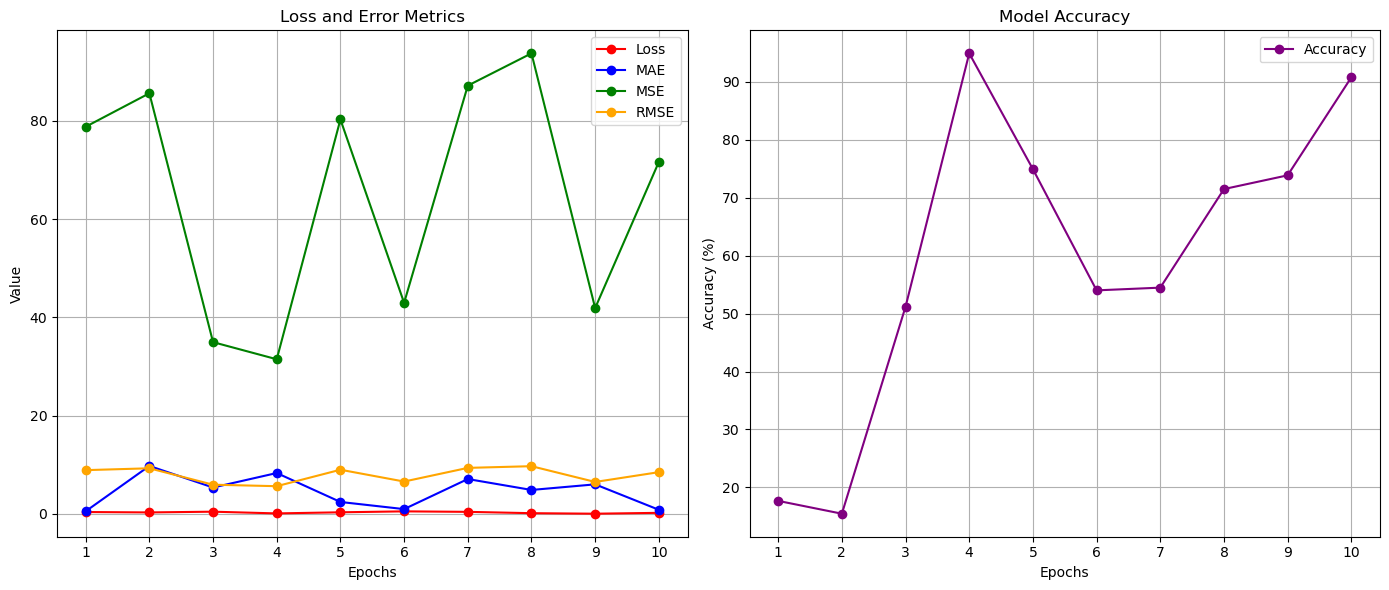

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Giả lập dữ liệu cho 10 epochs
epochs = np.arange(1, 11)  # 10 epochs
loss = np.random.rand(10) * 0.5  # Loss values
accuracy = np.random.rand(10) * 100  # Accuracy values
mae = np.random.rand(10) * 10  # Mean Absolute Error
mse = np.random.rand(10) * 100  # Mean Squared Error
rmse = np.sqrt(mse)  # Root Mean Squared Error

# Vẽ biểu đồ
plt.figure(figsize=(14, 6))

# Subplot cho Loss và MAE, MSE, RMSE
plt.subplot(1, 2, 1)
plt.plot(epochs, loss, label='Loss', marker='o', color='red')
plt.plot(epochs, mae, label='MAE', marker='o', color='blue')
plt.plot(epochs, mse, label='MSE', marker='o', color='green')
plt.plot(epochs, rmse, label='RMSE', marker='o', color='orange')
plt.title('Loss and Error Metrics')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.xticks(epochs)
plt.legend()
plt.grid()

# Subplot cho Accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, accuracy, label='Accuracy', marker='o', color='purple')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.xticks(epochs)
plt.legend()
plt.grid()

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()


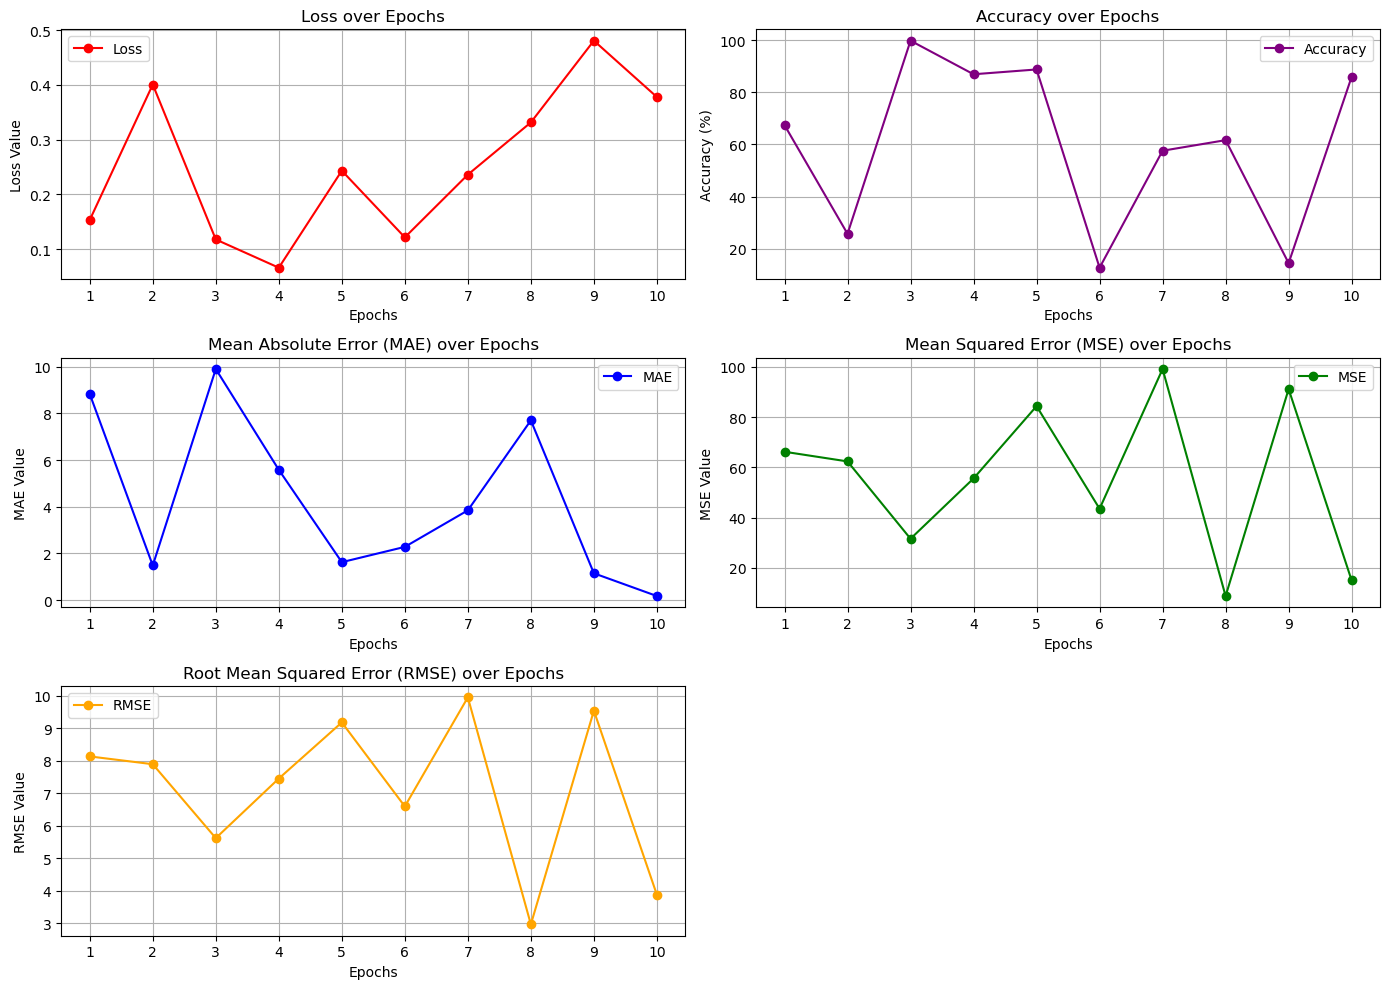

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Giả lập dữ liệu cho 10 epochs
epochs = np.arange(1, 11)  # 10 epochs
loss = np.random.rand(10) * 0.5  # Loss values
accuracy = np.random.rand(10) * 100  # Accuracy values
mae = np.random.rand(10) * 10  # Mean Absolute Error
mse = np.random.rand(10) * 100  # Mean Squared Error
rmse = np.sqrt(mse)  # Root Mean Squared Error

# Tạo 5 biểu đồ riêng biệt
plt.figure(figsize=(14, 10))

# Biểu đồ 1: Loss
plt.subplot(3, 2, 1)
plt.plot(epochs, loss, label='Loss', marker='o', color='red')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss Value')
plt.xticks(epochs)
plt.legend()
plt.grid()

# Biểu đồ 2: Accuracy
plt.subplot(3, 2, 2)
plt.plot(epochs, accuracy, label='Accuracy', marker='o', color='purple')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.xticks(epochs)
plt.legend()
plt.grid()

# Biểu đồ 3: MAE
plt.subplot(3, 2, 3)
plt.plot(epochs, mae, label='MAE', marker='o', color='blue')
plt.title('Mean Absolute Error (MAE) over Epochs')
plt.xlabel('Epochs')
plt.ylabel('MAE Value')
plt.xticks(epochs)
plt.legend()
plt.grid()

# Biểu đồ 4: MSE
plt.subplot(3, 2, 4)
plt.plot(epochs, mse, label='MSE', marker='o', color='green')
plt.title('Mean Squared Error (MSE) over Epochs')
plt.xlabel('Epochs')
plt.ylabel('MSE Value')
plt.xticks(epochs)
plt.legend()
plt.grid()

# Biểu đồ 5: RMSE
plt.subplot(3, 2, 5)
plt.plot(epochs, rmse, label='RMSE', marker='o', color='orange')
plt.title('Root Mean Squared Error (RMSE) over Epochs')
plt.xlabel('Epochs')
plt.ylabel('RMSE Value')
plt.xticks(epochs)
plt.legend()
plt.grid()

# Căn chỉnh và hiển thị biểu đồ
plt.tight_layout()
plt.show()
